In [3]:
import warnings
warnings.filterwarnings('ignore', 
    message='.*Attempting to register factory for plugin.*')
warnings.filterwarnings('ignore',
    message='.*computation placer already registered.*')

import os
os.chdir('/app/NBT-Classifier/')
import glob
import numpy as np
import pandas as pd
import openslide
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt 

from utils import Reinhard, get_TC
from utils_vis import get_GAPCAM, get_gradCAM, plot_oneline

import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.19.0
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
patch_size = 1024
model_weights = './data/TC_1024px.h5'
model = get_TC(model_weights, image_size=(patch_size, patch_size), num_classes=3, output_features=False)

/cephfs/volumes/hpc_data_prj/cb_histology_data/8b8186f5-4ae0-4605-94c4-46d4ff4e62b0/Siyuan/Docker_test/nbtclassifier/NBT-Classifier/utils.py:41: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  net = MobileNet(include_top=False, input_shape=(image_size[0], image_size[1], 3))
I0000 00:00:1746531704.300991 2137962 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3234 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB MIG 1g.5gb, pci bus id: 0000:17:00.0, compute capability: 8.0


## CAMs

/scratch/users/k21066795/conda/nbtclassifier/lib/python3.9/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 1024, 1024, 3))
  warnings.warn(msg)
I0000 00:00:1746531712.022193 2137962 cuda_dnn.cc:529] Loaded cuDNN version 90300


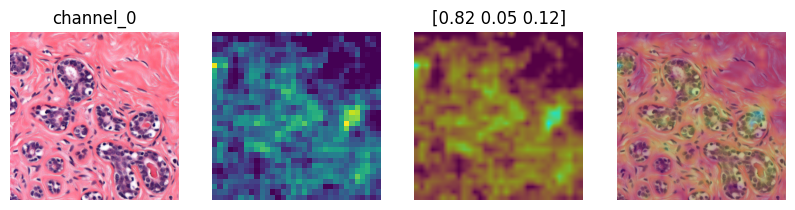

In [4]:
img_path = "../examples/patch_examples/T18-08826 I1 HE [x=19456,y=90112,w=1024,h=1024].png"
channel = 0
pred_prob, img, CAM, cam_heatmap, super_imposed_cam = get_GAPCAM(img_path = img_path, model = model, layer='conv_pw_13_relu', 
                                                            label_index=channel, with_grids=False, patch_size=patch_size)

plot_oneline(img_list=[img, CAM, cam_heatmap, super_imposed_cam], 
             caption_list=[f'channel_{channel}','',pred_prob,''],
             figure_size=(10, 5),  save_pt=None) 

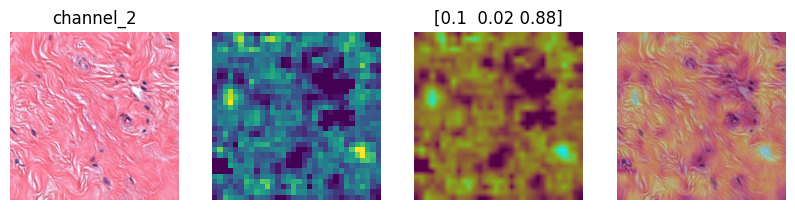

In [5]:
img_path = "../examples/patch_examples/T18-08826 I1 HE [x=28672,y=67584,w=1024,h=1024].png"
channel = 2
pred_prob, img, CAM, cam_heatmap, super_imposed_cam = get_GAPCAM(img_path = img_path, model = model, layer='conv_pw_13_relu', 
                                                            label_index=channel, with_grids=False, patch_size=patch_size)

plot_oneline(img_list=[img, CAM, cam_heatmap, super_imposed_cam], 
             caption_list=[f'channel_{channel}','',pred_prob,''],
             figure_size=(10, 5),  save_pt=None) 

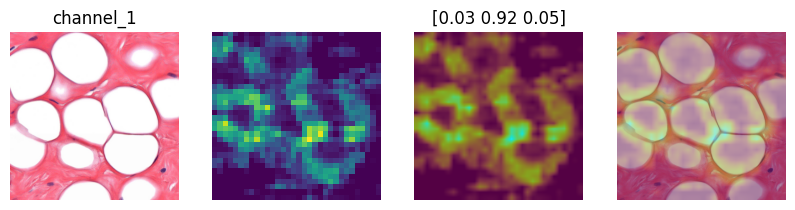

In [6]:
img_path = "../examples/patch_examples/T18-08826 I1 HE [x=69632,y=38912,w=1024,h=1024].png"
channel = 1
pred_prob, img, CAM, cam_heatmap, super_imposed_cam = get_GAPCAM(img_path = img_path, model = model, layer='conv_pw_13_relu', 
                                                            label_index=channel, with_grids=False, patch_size=patch_size)

plot_oneline(img_list=[img, CAM, cam_heatmap, super_imposed_cam], 
             caption_list=[f'channel_{channel}','',pred_prob,''],
             figure_size=(10, 5),  save_pt=None) # f"{save_pt}{channel}"

## Grad-CAMs

tf.Tensor([[0.82310146 0.05195768 0.12494082]], shape=(1, 3), dtype=float32)
(1024, 1024, 3)


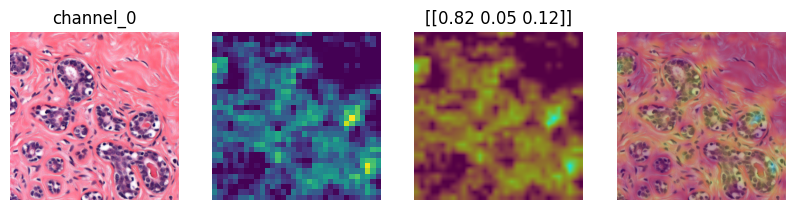

In [7]:
img_path = "../examples/patch_examples/T18-08826 I1 HE [x=19456,y=90112,w=1024,h=1024].png"
channel = 0
pred_prob, img, CAM, cam_heatmap, super_imposed_cam = get_gradCAM(img_path = img_path, model = model, layer='conv_pw_13_relu', 
                                                            label_index=channel, with_grids=False, patch_size=patch_size)

plot_oneline(img_list=[img, CAM, cam_heatmap, super_imposed_cam], 
             caption_list=[f'channel_{channel}','',pred_prob,''],
             figure_size=(10, 5),  save_pt=None) # f"{save_pt}{channel}"

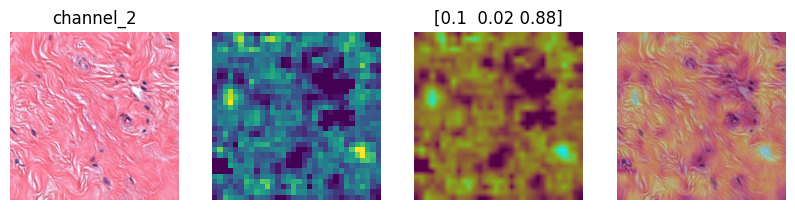

In [8]:
img_path = "../examples/patch_examples/T18-08826 I1 HE [x=28672,y=67584,w=1024,h=1024].png"
channel = 2
pred_prob, img, CAM, cam_heatmap, super_imposed_cam = get_GAPCAM(img_path = img_path, model = model, layer='conv_pw_13_relu', 
                                                            label_index=channel, with_grids=False, patch_size=patch_size)

plot_oneline(img_list=[img, CAM, cam_heatmap, super_imposed_cam], 
             caption_list=[f'channel_{channel}','',pred_prob,''],
             figure_size=(10, 5),  save_pt=None) # f"{save_pt}{channel}"

tf.Tensor([[0.02612169 0.9240213  0.04985711]], shape=(1, 3), dtype=float32)
(1024, 1024, 3)


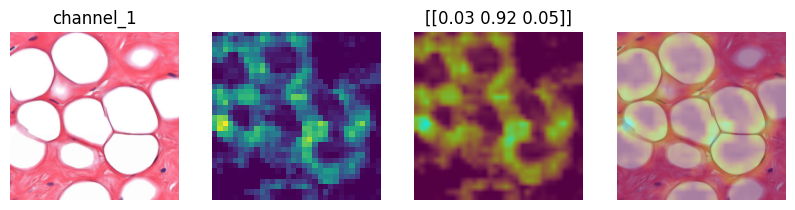

In [9]:
img_path = "../examples/patch_examples/T18-08826 I1 HE [x=69632,y=38912,w=1024,h=1024].png"
channel = 1
pred_prob, img, CAM, cam_heatmap, super_imposed_cam = get_gradCAM(img_path = img_path, model = model, layer='conv_pw_13_relu', 
                                                            label_index=channel, with_grids=False, patch_size=patch_size)

plot_oneline(img_list=[img, CAM, cam_heatmap, super_imposed_cam], 
             caption_list=[f'channel_{channel}','',pred_prob,''],
             figure_size=(10, 5),  save_pt=None) # f"{save_pt}{channel}"